# Ford Gobike. 
# Effects of data characters on duration of trip
## by Iboudullaev Fazliddin

## Investigation Overview

> I want to view the impact of different data characters on trip duration. My data characters are start-end stations, user type, rental access method and bike id. 

## Dataset Overview

> My dateset contains 176799 entries. There are 14 columns which are duration_sec, start_time, end_time, start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude, end_station_longitude, bike_id, user_type, rental_access_method.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('202003-baywheels-tripdata.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176799 entries, 0 to 176798
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             176799 non-null  int64  
 1   start_time               176799 non-null  object 
 2   end_time                 176799 non-null  object 
 3   start_station_id         110696 non-null  float64
 4   start_station_name       111349 non-null  object 
 5   start_station_latitude   176799 non-null  float64
 6   start_station_longitude  176799 non-null  float64
 7   end_station_id           111097 non-null  float64
 8   end_station_name         111794 non-null  object 
 9   end_station_latitude     176799 non-null  float64
 10  end_station_longitude    176799 non-null  float64
 11  bike_id                  176799 non-null  int64  
 12  user_type                176799 non-null  object 
 13  rental_access_method     114269 non-null  object 
dtypes: f

## Distribution of trip durations

> Apparently, trip duration is centered with values which are less than 2000 seconds. The longest trip is around 600-700 seconds. Number of trips starts from around 8000 to 12000 and after that it falls down with 2000 at 2000 seconds.

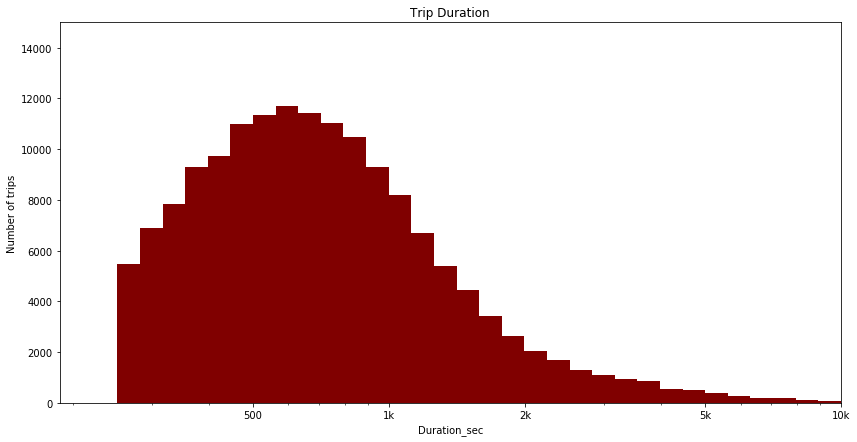

In [4]:
#As you can see from above plot, tail is too long. Let us use log scale then
log_binsize = 0.05
bins_log = 10 ** np.arange(2.4, np.log10(df.duration_sec.max())+log_binsize, log_binsize)

#for sizing the plot
plt.figure(figsize=[14, 7])

#plotting the histogram
plt.hist(data = df, x = 'duration_sec', bins = bins_log, color='maroon')
plt.title('Trip Duration')
plt.xlabel('Duration_sec')
plt.ylabel('Number of trips')
plt.xscale('log')
plt.xticks([500, 1e3, 2e3, 5e3, 1e4], [500, '1k', '2k', '5k', '10k'])
plt.axis([0, 10000, 0, 15000]);

## Start and end station distribution

> Apparently, the start and end stations are the same.

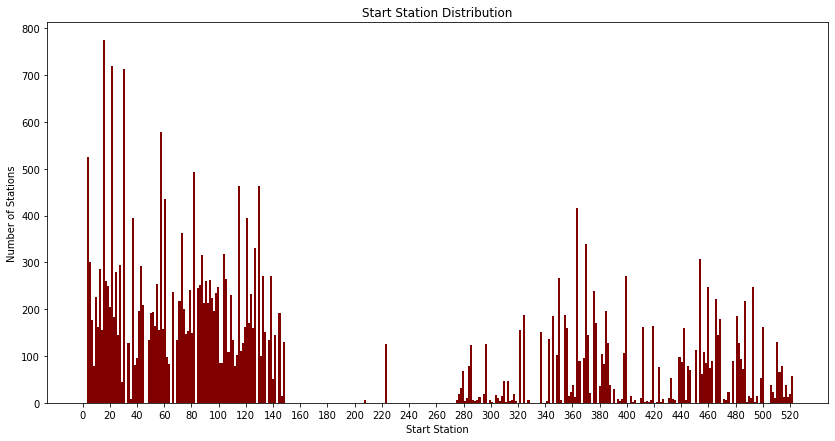

In [5]:
#on standard scale I try to plot start station id distribution
binsize = 1.5
bins = np.arange(0, df.start_station_id.max()+binsize, binsize)

#for sizing the plot
plt.figure(figsize=[14, 7])

#plotting the histogram
plt.hist(data = df.dropna(), x = 'start_station_id', bins = bins, color='maroon')
plt.title('Start Station Distribution')
plt.xlabel('Start Station')
plt.ylabel('Number of Stations')
plt.xticks(range(0, 540, 20));

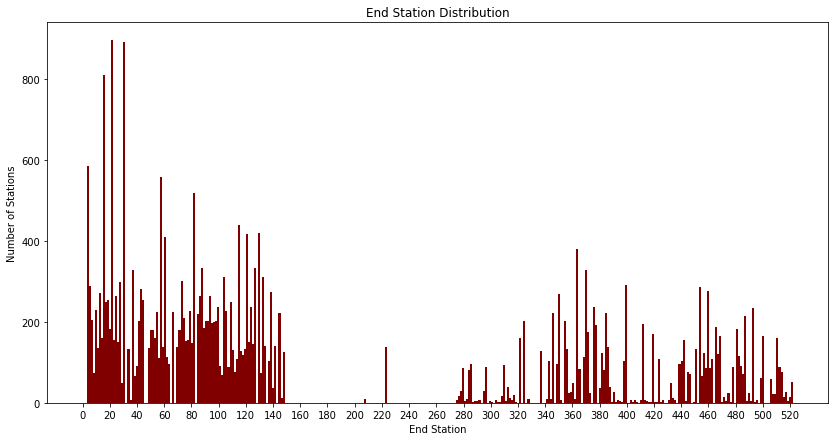

In [6]:
#on standard scale I try to plot end station id distribution
binsize = 1.5
bins = np.arange(0, df.end_station_id.max()+binsize, binsize)

#for sizing the plot
plt.figure(figsize=[14, 7])

#plotting the histogram
plt.hist(data = df.dropna(), x = 'end_station_id', bins = bins, color='maroon')
plt.title('End Station Distribution')
plt.xlabel('End Station')
plt.ylabel('Number of Stations')
plt.xticks(range(0, 540, 20));

## Trip duration  and user type
> Apparently, the customers are more willing to take long trips than subscribers.

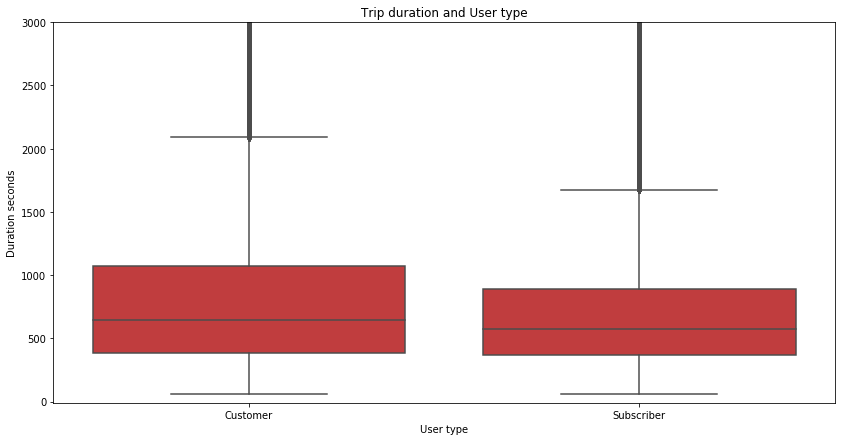

In [7]:
plt.figure(figsize=[14,7])
base_color = sb.color_palette()[3]
sb.boxplot(data = df, x = 'user_type', y = 'duration_sec', color=base_color)
plt.title('Trip duration and User type')
plt.xlabel('User type')
plt.ylabel('Duration seconds')
plt.ylim(-10, 3000);

## Trip duration and rental access method
> If you look at the rental accessing method deeper, you will realize that people who use app takes long trips than clipper.

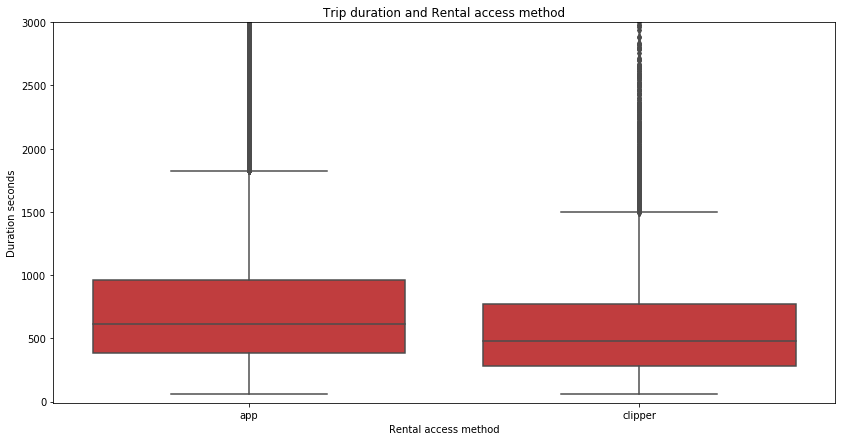

In [8]:
plt.figure(figsize=[14,7])
base_color = sb.color_palette()[3]
sb.boxplot(data = df, x = 'rental_access_method', y = 'duration_sec', color=base_color)
plt.title('Trip duration and Rental access method')
plt.xlabel('Rental access method')
plt.ylabel('Duration seconds')
plt.ylim(-10, 3000);

## Trip duration per User type and Rental access method
> Customers use app more often than clipper. Subscribers use app and clipper very often and trip duration is also same.

<Figure size 1008x504 with 0 Axes>

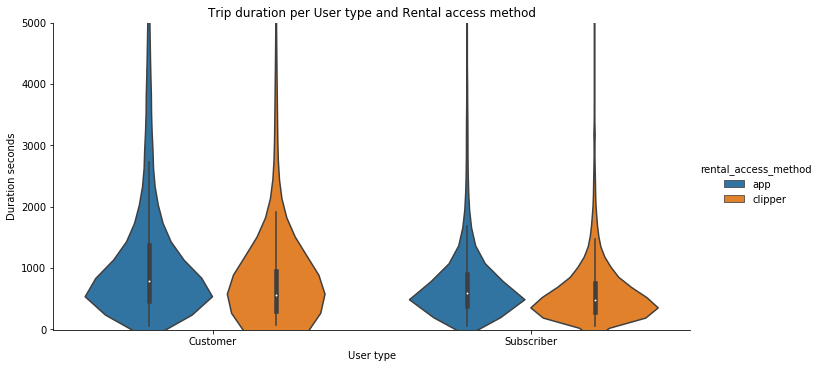

In [9]:
plt.figure(figsize=[14,7])
sb.catplot(data=df, x='user_type', y='duration_sec', hue = 'rental_access_method', kind='violin', height=5, aspect=2)
plt.title('Trip duration per User type and Rental access method')
plt.xlabel('User type')
plt.ylabel('Duration seconds')
plt.ylim(-10, 5000);  

## Trip Duration, user type, and bike_id
> Interestingly subscribers take bikes not quite often. Whereas customers take bikes very often and trip duration is also very long.

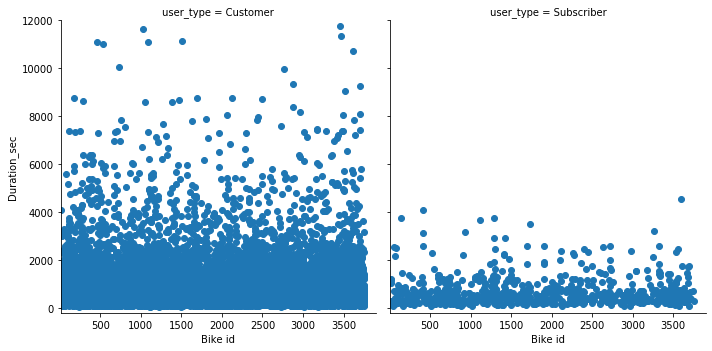

In [10]:
user_type = sb.FacetGrid(data = df, col = 'user_type', col_wrap = 2, size = 5, xlim = [10, 3900], ylim = [-200, 12000])
user_type.map(plt.scatter, 'bike_id', 'duration_sec', alpha= 1)

user_type.set_xlabels('Bike id')
user_type.set_ylabels('Duration_sec');

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!

In [4]:

from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [5]:
!jupyter nbconvert slide_deck_template.ipynbb --to slides --post serve --template output_toggle

[NbConvertApp] WARNING | pattern 'slide_deck_template.ipynbb' matched no files
This application is used to convert notebook files (*.ipynb) to various other
formats.


Options
-------

Arguments that take values are actually convenience aliases to full
Configurables, whose aliases are listed on the help line. For more information
on full configurables, see '--help-all'.

--debug
    set log level to logging.DEBUG (maximize logging output)
--generate-config
    generate default config file
-y
    Answer yes to any questions instead of prompting.
--execute
    Execute the notebook prior to export.
--allow-errors
    Continue notebook execution even if one of the cells throws an error and include the error message in the cell output (the default behaviour is to abort conversion). This flag is only relevant if '--execute' was specified, too.
--stdin
    read a single notebook file from stdin. Write the resulting notebook with default basename 'notebook.*'
--stdout
    Write notebook output